# Association Analysis with the apriori algorithm

The data belongs to a bakery called "The Bread Basket", located in the historic center of Edinburgh. The dataset contains more than 9000 transactions from the bakery. The file contains the following columns:

- Date. Categorical variable that tells us the date of the transactions (YYYY-MM-DD format). The column includes dates from 30/10/2016 to 09/04/2017.

- Time. Categorical variable that tells us the time of the transactions (HH:MM:SS format).

- Transaction. Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction.

- Item. Categorical variable with the products.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [2]:
%matplotlib inline

In [3]:
# Reading the dataset from file
def load_dataset(file_name):
    with open(file_name, 'r') as f:
        content = f.readlines()[1:]
    transactions = []
    prev_tid = -1
    for t in content:
        t = t.strip().split(',')[-2:]
        tid = t[0]
        item = t[1]
        if prev_tid != tid:
            prev_tid = tid
            transactions.append([item])
        else:
            transactions[-1].append(item)
    return transactions

In [4]:
dataset = load_dataset('BreadBasket_DMS.csv')
#dataset is a 2D list
print("Num transactions:", len(dataset))
#line below prints the first 10 transactions
dataset[:10]

Num transactions: 9531


[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

The code below displays the top 10 selling items by frequency in a bar chart

[('Coffee', 5471), ('Bread', 3325), ('Tea', 1435), ('Cake', 1025), ('Pastry', 856), ('NONE', 786), ('Sandwich', 771), ('Medialuna', 616), ('Hot chocolate', 590), ('Cookies', 540)]
['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'NONE', 'Sandwich', 'Medialuna', 'Hot chocolate', 'Cookies']
[5471, 3325, 1435, 1025, 856, 786, 771, 616, 590, 540]
[9 8 7 6 5 4 3 2 1 0]


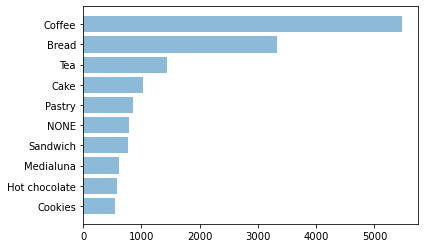

In [5]:
from collections import *
from itertools import *

#Counter object below will "flatten" the dataset and display it in frequent order
c = Counter(chain.from_iterable(dataset)).most_common(10)
c = list(c)

transactionValues=[]
items = []

#lines below add top 10 frequent item names to items[] and their values to transactionValues[]
for i in c:
    items.append(i[0])
    transactionValues.append(i[1])

#graphing code
y_pos = np.arange(len(items))
y_pos = y_pos[::-1]
plt.barh(y_pos, transactionValues, align='center', alpha=0.5)
plt.yticks(y_pos, items)
print(c)
print(items)
print(transactionValues)
print(y_pos)

`mlxtend.preprocessing.TransactionEncoder` will be used to transform `dataset` into an array format suitable for the `mlxtend` library. 

`TransactionEncoder` learns unique items from the dataset and transforms each transaction into a one-hot encoded boolean numpy array. For example, the resulting encoded dataset will be represented by something like this, where each row is a transaction:
<img src="table.png">

In [6]:
newEncoder = TransactionEncoder()
newEncoder.fit(dataset)
nearray = newEncoder.transform(dataset)
#line below just sample line that reverses the transform 
#newEncoder.inverse_transform(nearray[:5])

Code below will convert the numpy array to a pandas dataframe

In [7]:
df = pd.DataFrame(nearray, columns=newEncoder.columns_)
print(df.head(1))

   Adjustment  Afternoon with the baker  Alfajores  Argentina Night  Art Tray  \
0       False                     False      False            False     False   

   Bacon  Baguette  Bakewell  Bare Popcorn  Basket  ...  The BART  The Nomad  \
0  False     False     False         False   False  ...     False      False   

   Tiffin  Toast  Truffles  Tshirt  Valentine's card  Vegan Feast  \
0   False  False     False   False             False        False   

   Vegan mincepie  Victorian Sponge  
0           False             False  

[1 rows x 95 columns]


`mlxtend.frequent_patterns.apriori` is used to generate the frequent itemsets with minimum support of 1%, also displayed is their support values

In [8]:
x=apriori(df, min_support=0.01)
x

,support,itemsets
0,0.036093,(2)
1,0.015948,(6)
2,0.324940,(11)
3,0.039765,(14)
4,0.103137,(15)
...,...,...
58,0.049523,"(84, 23)"
59,0.023502,"(88, 23)"
60,0.018256,"(84, 62)"
61,0.014269,"(74, 84)"


Now all frequent maximal datasets and their support values will be displayed below

In [11]:
nonMax=[]
for index, row in x.iterrows():
    for index, row2 in x.iterrows():
        if((row['itemsets'].issubset(row2['itemsets'])) and (row['itemsets'])!=(row2['itemsets'])):
            nonMax.append(row['itemsets'])
unique=list(set(nonMax))

df2 = x.copy(deep=True)
df2=df2[~df2.itemsets.isin(unique)]
df2

,support,itemsets
1,0.015948,(6)
5,0.012905,(18)
7,0.019305,(25)
9,0.038926,(37)
10,0.014899,(40)
11,0.010492,(46)
13,0.014899,(49)
14,0.013115,(50)
17,0.014059,(57)
21,0.010387,(73)


`mlxtend.frequent_patterns.association_rules` will now be used to calculate rules with a confidence level of 0.25 for the frequent itemsets generated earlier

In [12]:
from mlxtend.frequent_patterns import association_rules

association_rules(x, metric='confidence', min_threshold=0.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2),(11),0.036093,0.324940,0.010282,0.284884,0.876728,-0.001446,0.943987
1,(2),(23),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
2,(14),(11),0.039765,0.324940,0.010702,0.269129,0.828244,-0.002219,0.923639
3,(11),(23),0.324940,0.475081,0.089393,0.275105,0.579069,-0.064980,0.724131
4,(26),(11),0.054034,0.324940,0.014374,0.266019,0.818673,-0.003184,0.919725
5,(55),(11),0.061379,0.324940,0.016787,0.273504,0.841708,-0.003157,0.929201
6,(62),(11),0.079005,0.324940,0.020564,0.260292,0.801048,-0.005107,0.912604
7,(66),(11),0.085510,0.324940,0.028958,0.338650,1.042194,0.001172,1.020731
8,(14),(23),0.039765,0.475081,0.019515,0.490765,1.033013,0.000624,1.030799
9,(15),(23),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667


The code below will generate the frequent itemsets with minimum support of 0.5% and plot the number of rules generated with respect to the confidence threshold by varying its value between 0 and 1 with increments of 0.1 in order to get an idea of where to select our cutoff to balance number of rules with confidence values

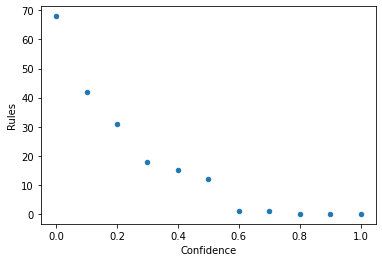

In [13]:
def newRange(x, y, jump):
  while x < y:
    yield x
    x += jump

ruleList = []
confidenceThreshold = []
for i in newRange(0, 1, .1):
    num = 0
    num = len(association_rules(x, metric="confidence", min_threshold=i))
    ruleList.append(num)
    confidenceThreshold.append(i)
ruleDF = pd.DataFrame({'Rules':ruleList, 'Confidence':confidenceThreshold})
ruleDF.plot(x="Confidence", y="Rules", kind="scatter")


Because of the "drop" at a confidence level of 0.5, going past this may not be very useful for us given that the number of rules returned drops to a very low level and so the "predictive value" of the algorithm will be small. 0.5 is a good balance point

In [14]:
association_rules(x, metric='confidence', min_threshold=0.50)
# An interesting note about the rules is that they all have a single consequent in common, that being Coffee in this case

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2),(23),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
1,(15),(23),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
2,(26),(23),0.054034,0.475081,0.028014,0.518447,1.091280,0.002343,1.090053
3,(48),(23),0.057916,0.475081,0.029378,0.507246,1.067704,0.001863,1.065276
4,(51),(23),0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031
5,(55),(23),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561
6,(62),(23),0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908
7,(66),(23),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079
8,(74),(23),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468
9,(76),(23),0.034309,0.475081,0.017941,0.522936,1.100729,0.001642,1.100310
